# Setup

In [3]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install
!wandb disabled 

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.10 torch-2.0.0+cpu CPU


Setup complete ✅ (4 CPUs, 31.4 GB RAM, 4813.6/8062.4 GB disk)


---
# Train YOLOv5s on Custom Dataset

In [7]:
# Train YOLOv5s on Guns & Knives Dataset for 100 epochs
!python train.py --img 640 --batch 8 --epochs 100 --data /kaggle/input/guns-knives-object-detection/data.yaml --weights yolov5s.pt --cache

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
train: weights=yolov5s.pt, cfg=, data=/kaggle/input/guns-knives-object-detection/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.10 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay

In [10]:
!zip -r /kaggle/working/last_run.zip /kaggle/working/yolov5/yolov5/runs/train/exp3

updating: kaggle/working/yolov5/yolov5/runs/train/exp3/ (stored 0%)
updating: kaggle/working/yolov5/yolov5/runs/train/exp3/labels_correlogram.jpg (deflated 36%)
updating: kaggle/working/yolov5/yolov5/runs/train/exp3/opt.yaml (deflated 48%)
updating: kaggle/working/yolov5/yolov5/runs/train/exp3/val_batch0_pred.jpg (deflated 16%)
updating: kaggle/working/yolov5/yolov5/runs/train/exp3/train_batch0.jpg (deflated 10%)
updating: kaggle/working/yolov5/yolov5/runs/train/exp3/F1_curve.png (deflated 12%)
updating: kaggle/working/yolov5/yolov5/runs/train/exp3/events.out.tfevents.1688903055.3e63547c39a2.951.0 (deflated 36%)
updating: kaggle/working/yolov5/yolov5/runs/train/exp3/val_batch2_labels.jpg (deflated 14%)
updating: kaggle/working/yolov5/yolov5/runs/train/exp3/PR_curve.png (deflated 18%)
updating: kaggle/working/yolov5/yolov5/runs/train/exp3/confusion_matrix.png (deflated 34%)
updating: kaggle/working/yolov5/yolov5/runs/train/exp3/labels.jpg (deflated 25%)
updating: kaggle/working/yolov5/y

# Exporting Model

In [11]:
!python export.py --weights /kaggle/working/yolov5/yolov5/runs/train/exp3/weights/best.pt 

export: data=data/coco128.yaml, weights=['/kaggle/working/yolov5/yolov5/runs/train/exp3/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['torchscript']
YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.10 torch-2.0.0 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from /kaggle/working/yolov5/yolov5/runs/train/exp3/weights/best.pt with output shape (1, 25200, 7) (13.8 MB)

TorchScript: starting export with torch 2.0.0...
TorchScript: export success ✅ 2.9s, saved as /kaggle/working/yolov5/yolov5/runs/train/exp3/weights/best.torchscript (27.2 MB)

Export complete (3.8s)
Results saved to /kaggle/working/yolov5/yolov5/runs/train/exp3/weights
Detect:          python detect.py --weight

# Detect
```
python detect.py --source 0  # webcam
                          img.jpg  # image
                          vid.mp4  # video
                          screen  # screenshot
                          path/  # directory
                         'path/*.jpg'  # glob
                         'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                         'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```

In [7]:
!python detect.py --weights /kaggle/working/yolov5/yolov5/runs/train/exp3/weights/best.pt --img 640 --conf 0.25 --source /kaggle/input/guns-knives-object-detection/test/images/DefenseKnifeAttack0093_jpg.rf.8d998dae5f0fabb1cd0264e83818327d.jpg
# display.Image(filename='/content/guns-knives/test/images/ABbframe00430_jpg.rf.96d982419a6d9599251ac97550753706.jpg', width=600)

detect: weights=['/kaggle/working/yolov5/yolov5/runs/train/exp3/weights/best.pt'], source=/kaggle/input/guns-knives-object-detection/test/images/DefenseKnifeAttack0093_jpg.rf.8d998dae5f0fabb1cd0264e83818327d.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.10 torch-2.0.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /kaggle/input/guns-knives-object-detection/test/images/DefenseKnifeAttack0093_jpg.rf.8d998dae5f0fabb1cd0264e83818327d.jpg: 640x640 1 knife, 296.2ms
Speed: 6.9ms pre-process, 296.2ms inference, 18.5ms NMS per image at shape (1, 3,

# Saving & Reusing Best Weights (best.pt)

In [9]:
import torch
import PIL

In [14]:
model = torch.hub.load('','custom', path='/kaggle/working/yolov5/yolov5/runs/train/exp3/weights/best.pt',force_reload=True,source='local')
im1 = model("/kaggle/input/guns-knives-object-detection/test/images/DefenseKnifeAttack0093_jpg.rf.8d998dae5f0fabb1cd0264e83818327d.jpg")
im2 = model("/kaggle/input/guns-knives-object-detection/test/images/ABsframe00214_jpg.rf.ae6c1e7d4c8e474123569e8bfa08f701.jpg")
im1.save() # or .show(), .save(), .crop(), .pandas(), etc.
im2.save()

YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.10 torch-2.0.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
Saved 1 image to runs/detect/exp4
Saved 1 image to runs/detect/exp5


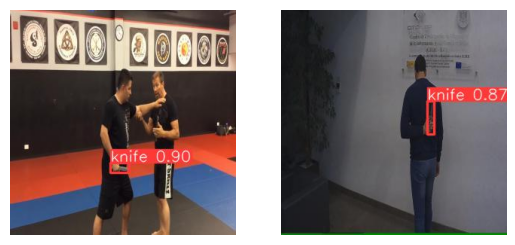

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.subplot(1,2,1)
img = mpimg.imread("/kaggle/working/yolov5/runs/detect/exp3/DefenseKnifeAttack0093_jpg.rf.8d998dae5f0fabb1cd0264e83818327d.jpg")
imgplot = plt.imshow(img)
plt.axis('off') 

plt.subplot(1,2,2)
img = mpimg.imread("/kaggle/working/yolov5/runs/detect/exp5/ABsframe00214_jpg.rf.ae6c1e7d4c8e474123569e8bfa08f701.jpg")
imgplot = plt.imshow(img)
plt.axis('off')

plt.show()